# Processamento Klett

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#from atmospheric_lidar import licelv2
import glob
import os
#from atmospheric_lidar.licel import LicelLidarMeasurement
from lifa.licel import LicelLidarMeasurement
import lifa
import pandas as pd

### Importa dados de referencia

In [14]:
ref_data = pd.read_csv('./sample_data/klett/rc532_20160406_0029_0229.txt', delimiter='\t')
ref = {}
ref['z'] = ref_data['Altitude(m)'].to_numpy()
ref['rayleigh_signal'] =  ref_data['Range Corrected Signal(m^-1 sr^-1)'].to_numpy()
ref['rayleigh_lambda'] = 532


ref_klett_data = pd.read_csv('./sample_data/klett/b532_20160406_0029_0229.txt', delimiter='\t')
ref_klett = {}
ref_klett['z'] = ref_klett_data['Altitude(m)'].to_numpy()
ref_klett['molecular'] = ref_klett_data['beta_molecular(m^-1 sr^-1)'].to_numpy()
ref_klett['backscatter'] = ref_klett_data['beta_aerosol(m^-1 sr^-1)'].to_numpy()




In [99]:
# dados dos russos
rus_data = pd.read_csv('./sample_data/klett/signal.txt', delimiter='\t')
rus_z = rus_data['H'].to_numpy()
rus_molecular = rus_data['532_Anlg_Molec']
rus_bk_molecular = rus_data['MolecBack532_Anlg']
rus_ex_molecular = rus_data['MolecExt532_Anlg']





In [98]:
rus_data

,H,355_Anlg,353_Anlg,460_Anlg,532_Anlg,530_Anlg,355_Anlg_Molec,532_Anlg_Molec,Unnamed: 8,MolecExt355_Anlg,MolecBack355_Anlg,MolecExt353_Anlg,MolecBack353_Anlg,MolecExt460_Anlg,MolecBack460_Anlg,MolecExt532_Anlg,MolecBack532_Anlg,MolecExt530_Anlg,MolecBack530_Anlg
0,0.00,7.475900,0.218869,0.044068,5.640380e+00,0.027637,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.75,11.012444,0.695331,0.110171,1.166779e+01,0.095550,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.50,4.588112,0.966126,0.085155,5.772459e+00,0.133927,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.25,2.989588,0.871019,0.024788,-3.473283e-01,0.114199,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.00,5.320261,0.809182,0.027062,1.823342e+00,0.097365,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16369,61383.75,-0.000007,-0.000076,-0.000117,-9.501840e-05,0.000014,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16370,61387.50,0.000011,0.000011,-0.000073,-8.358079e-08,-0.000034,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16371,61391.25,0.000082,0.000148,-0.000026,6.671156e-05,-0.000086,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16372,61395.00,0.000018,0.000005,0.000046,-1.201033e-05,-0.000029,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Temperatura e pressão atmosfera


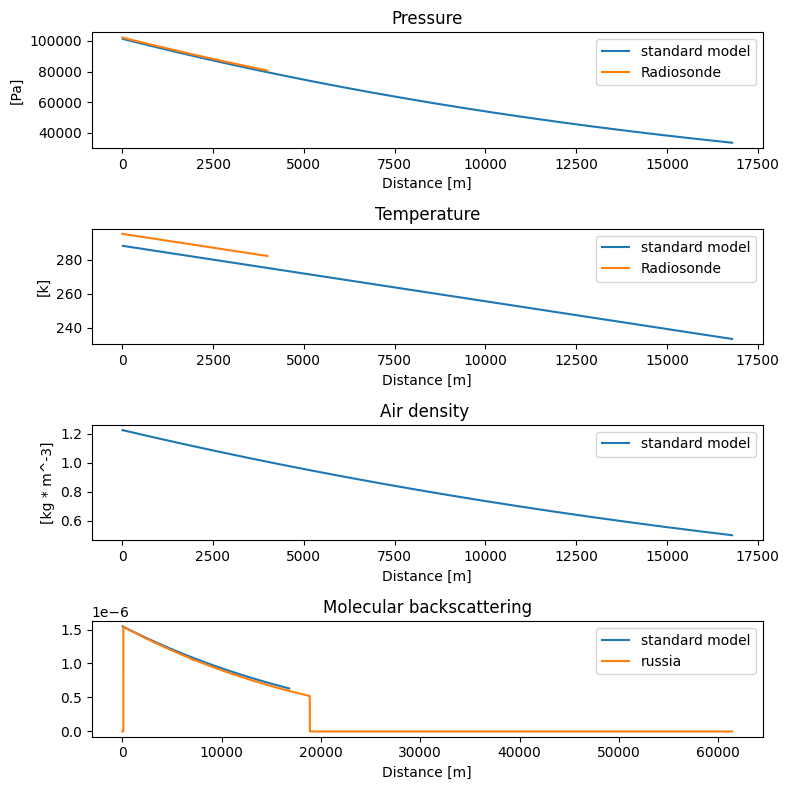

In [100]:
import lifa.processing.helper_functions as hp
import math

elevation_angle = 30
elevation = 0
wavelength = 532
z = ref['z']
height = z * math.sin(math.radians(elevation_angle)) + elevation 

# Modelo Padrão
pressure, temperature, density = hp.standard_atmosphere(height)
molecular_backscatter = hp.molecular_backscatter(wavelength, pressure, temperature)

# Radiosonda
sonde_data = ref_klett_data = pd.read_csv('./sample_data/klett/press_and_temp.csv', delimiter=',')
z_sonde = sonde_data['z_m'].to_numpy()/math.sin(math.radians(elevation_angle)) - elevation
pressure_sonde = sonde_data['p_Pa'].to_numpy()
temperature_sonde = sonde_data['T_K'].to_numpy()



plt.figure(figsize=(8,8))
plt.subplot(4,1,1)
plt.plot(z, pressure, label='standard model')
plt.plot(z_sonde, pressure_sonde, label='Radiosonde')
plt.ylabel('[Pa]')
plt.title('Pressure')
plt.xlabel('Distance [m]')
plt.legend(loc='upper right')

plt.subplot(4,1,2)
plt.plot(z, temperature, label='standard model')
plt.plot(z_sonde, temperature_sonde, label='Radiosonde')
plt.title('Temperature')
plt.ylabel('[k]')
plt.xlabel('Distance [m]')
plt.legend(loc='upper right')

plt.subplot(4,1,3)
plt.plot(z, density, label='standard model')
plt.title('Air density ')
plt.ylabel('[kg * m^-3]')
plt.xlabel('Distance [m]')
plt.legend(loc='upper right')

plt.subplot(4,1,4)
plt.plot(z, molecular_backscatter, label='standard model')
plt.plot(rus_z, rus_bk_molecular, label='russia')
plt.title('Molecular backscattering')
#plt.ylabel('[kg * m^-3]')
plt.xlabel('Distance [m]')
plt.legend(loc='upper right')



plt.tight_layout() # Adjusts subplot parameters for a tight layout
plt.show()

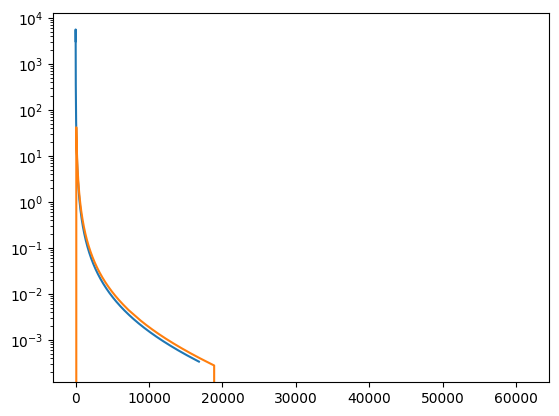

In [108]:
#Calcula sinal Lidar a partir somente do sinal molecular
# P(R) = k/R^2 O(R) B(R) exp (-2Integral(A(R)))

from scipy.integrate import cumulative_trapezoid
x = z
wavelength = 532

alpha = hp.molecular_extinction(wavelength, pressure, temperature)
beta = hp.molecular_backscatter(wavelength, pressure, temperature)

alpha_integral = cumulative_trapezoid(alpha, x, initial=0)

x[0] = 10
p = 1/np.square(x) * beta * np.exp(-2*alpha_integral)

#molecular_backscatter = hp.molecular_extinction()
#integral = cumulative_trapezoid(y, x, initial=0)
plt.plot(x, p*2e11)
plt.plot(rus_z, rus_molecular)
plt.yscale('log')

In [66]:
x

array([0.00000000e+00, 7.47146000e+00, 1.49429200e+01, ...,
       1.67808992e+04, 1.67883706e+04, 1.67958421e+04], shape=(2249,))

### Apresenta dados

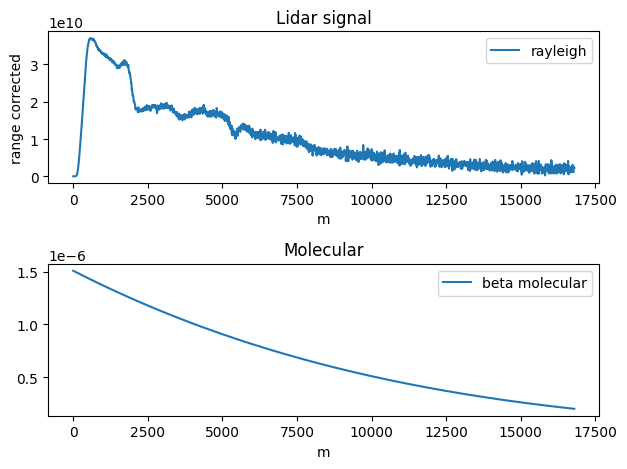

In [19]:
plt.subplot(2,1,1)
plt.plot(ref['z'], ref['rayleigh_signal'], label='rayleigh')
plt.title('Lidar signal')
#plt.yscale('log')
plt.legend(loc='upper right')
plt.ylabel('range corrected')
plt.xlabel('m')

plt.subplot(2,1,2)
plt.plot(ref['z'], ref_klett['molecular'], label='beta molecular')
plt.title('Molecular')
plt.legend(loc='upper right')
#plt.ylabel('')
plt.xlabel('m')

plt.tight_layout() # Adjusts subplot parameters for a tight layout
plt.show()



### Calcula backscatter

In [16]:
import lifa.processing.elastic_retrievals as el
rc_signal = ref['rayleigh_signal']
molecular_reference = ref_klett['molecular']

backscatter_output = el.klett_backscatter_aerosol(range_corrected_signal=rc_signal,
                                                       lidar_ratio_aerosol=50,
                                                       beta_molecular=molecular_reference,
                                                       index_reference=1338,
                                                       reference_range=134,
                                                       beta_aerosol_reference=3E-8,
                                                       bin_length=7.47146)

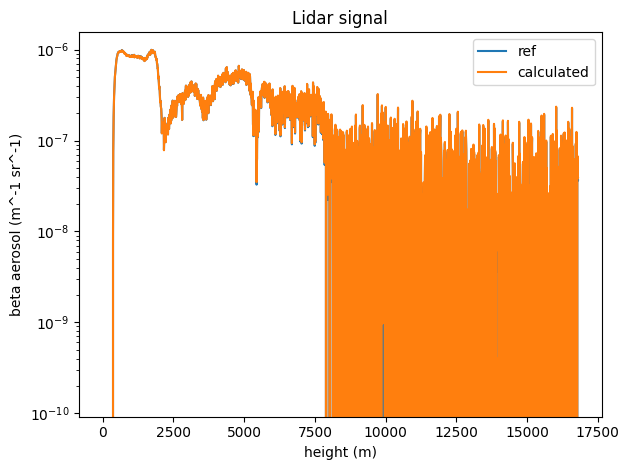

In [17]:
plt.subplot(1,1,1)
plt.plot(ref_klett['z'], ref_klett['backscatter'], label='ref')
plt.plot(ref_klett['z'], backscatter_output, label='calculated')
plt.title('Lidar signal')
plt.yscale('log')
plt.legend(loc='upper right')
plt.ylabel('beta aerosol (m^-1 sr^-1)')
plt.xlabel('height (m)')

plt.tight_layout() # Adjusts subplot parameters for a tight layout
plt.show()